In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_columns", 250)
pd.set_option("display.max_rows", 250)

In [2]:
# read data
df = pd.read_csv("telecom_churn_data.csv")

In [3]:
df.head() 

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.shape

(99999, 226)

In [5]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

There are 99999 rows and 226 columns in the data. Lot of the columns are numeric type, but we need to inspect which are the categorical columns.

In [6]:
# look at data statistics
df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

- As can be seen from above data, the details of usage of 4 months are given for users. From the date columns, we can see that the data is for the months June to September for the year 2014.
- It can also be noticed that some features contain only 0 as the value overall, which can be seen from the quartiles. We will drop such features.

In [7]:
#Finding null values
df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [8]:
churn=df.copy()

## Data cleaning and EDA

In [213]:
zero_col=[x for x in churn.columns if all(churn['{}'.format(x)].dropna().unique()==0)]
zero_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [214]:
#Dropping all columns with only 0 and Nan values.
churn.drop(zero_col,axis=1,inplace=True)

In [215]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols=['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9']

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

In [216]:
## create a list of recharge columns for analysis of missing values.
recharge_col = churn.columns[churn.columns.str.contains('rech')]
recharge_col

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [217]:
churn[recharge_col].describe(include='all')

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,98392,98232,96377,95239,25153,25571,26339,25922,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,31,31,30,30,31,31,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16960,17288,14706,22623,1888,1813,1998,2329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000


In [218]:
#Reacharge data analysis of Jun Month
recharge_amnt_Jun = churn.columns[churn.columns.str.contains('rech_amt_6|date_of_last_rech_6|rech_data_6|rech_amt_data_6|date_of_last_rech_data_6')]

churn.loc[:,recharge_amnt_Jun].describe(include='all')

,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,98392,25153,25153.000000,25153.000000,25153.000000
unique,NaN,NaN,30,30,NaN,NaN,NaN
top,NaN,NaN,6/30/2014,6/30/2014,NaN,NaN,NaN
freq,NaN,NaN,16960,1888,NaN,NaN,NaN
mean,327.514615,104.637486,NaN,NaN,2.463802,126.393392,192.600982
std,398.019701,120.614894,NaN,NaN,2.789128,108.477235,192.646318
min,0.000000,0.000000,NaN,NaN,1.000000,1.000000,1.000000
25%,109.000000,30.000000,NaN,NaN,1.000000,25.000000,82.000000
50%,230.000000,110.000000,NaN,NaN,1.000000,145.000000,154.000000
75%,437.500000,120.000000,NaN,NaN,3.000000,177.000000,252.000000


In [219]:
#Recharge data analysis of Jul Month
recharge_amnt_Jul = churn.columns[churn.columns.str.contains('rech_amt_7|date_of_last_rech_7|rech_data_7|rech_amt_data_7|date_of_last_rech_data_7')]

churn.loc[:,recharge_amnt_Jul].describe(include='all')

,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
count,99999.000000,99999.000000,98232,25571,25571.000000,25571.000000,25571.000000
unique,NaN,NaN,31,31,NaN,NaN,NaN
top,NaN,NaN,7/31/2014,7/31/2014,NaN,NaN,NaN
freq,NaN,NaN,17288,1813,NaN,NaN,NaN
mean,322.962970,104.752398,NaN,NaN,2.666419,126.729459,200.981292
std,408.114237,124.523970,NaN,NaN,3.031593,109.765267,196.791224
min,0.000000,0.000000,NaN,NaN,1.000000,1.000000,0.500000
25%,100.000000,30.000000,NaN,NaN,1.000000,25.000000,92.000000
50%,220.000000,110.000000,NaN,NaN,1.000000,145.000000,154.000000
75%,428.000000,128.000000,NaN,NaN,3.000000,177.000000,252.000000


In [220]:
#Recharge data analysis of Aug Month
recharge_amnt_Aug = churn.columns[churn.columns.str.contains('rech_amt_8|date_of_last_rech_8|rech_data_8|rech_amt_data_8|date_of_last_rech_data_8')]

churn.loc[:,recharge_amnt_Aug].describe(include='all')

,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8
count,99999.000000,99999.000000,96377,26339,26339.000000,26339.000000,26339.000000
unique,NaN,NaN,31,31,NaN,NaN,NaN
top,NaN,NaN,8/31/2014,8/31/2014,NaN,NaN,NaN
freq,NaN,NaN,14706,1998,NaN,NaN,NaN
mean,324.157122,107.728207,NaN,NaN,2.651999,125.717301,197.526489
std,416.540455,126.902505,NaN,NaN,3.074987,109.437851,191.301305
min,0.000000,0.000000,NaN,NaN,1.000000,1.000000,0.500000
25%,90.000000,30.000000,NaN,NaN,1.000000,25.000000,87.000000
50%,225.000000,98.000000,NaN,NaN,1.000000,145.000000,154.000000
75%,434.500000,144.000000,NaN,NaN,3.000000,179.000000,252.000000


In [221]:
#Recharge data analysis of Sept Month
recharge_amnt_Sept = churn.columns[churn.columns.str.contains('rech_amt_9|date_of_last_rech_9|rech_data_9|rech_amt_data_9|date_of_last_rech_data_9')]

churn.loc[:,recharge_amnt_Sept].describe(include='all')

,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,av_rech_amt_data_9
count,99999.000000,99999.000000,95239,25922,25922.000000,25922.00000,25922.000000
unique,NaN,NaN,30,30,NaN,NaN,NaN
top,NaN,NaN,9/29/2014,9/29/2014,NaN,NaN,NaN
freq,NaN,NaN,22623,2329,NaN,NaN,NaN
mean,303.345673,101.943889,NaN,NaN,2.441170,124.94144,192.734315
std,404.588583,125.375109,NaN,NaN,2.516339,111.36376,188.400286
min,0.000000,0.000000,NaN,NaN,1.000000,1.00000,1.000000
25%,52.000000,28.000000,NaN,NaN,1.000000,25.00000,69.000000
50%,200.000000,61.000000,NaN,NaN,2.000000,145.00000,164.000000
75%,415.000000,144.000000,NaN,NaN,3.000000,179.00000,252.000000


In [222]:
# It is also observed that the recharge date and the recharge value are missing together and in corresponding usage columns has value 0,which means the customer didn't recharge
churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6",'vol_2g_mb_6','vol_3g_mb_6','monthly_2g_6','monthly_3g_6','count_rech_2g_6','count_rech_3g_6','fb_user_6','night_pck_user_6']].head(20)

,total_rech_data_6,date_of_last_rech_data_6,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,monthly_3g_6,count_rech_2g_6,count_rech_3g_6,fb_user_6,night_pck_user_6
1,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN
2,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN
3,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN
5,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN
6,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN
7,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN
8,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN
9,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN
10,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN
11,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN


In [223]:
# create a list of data recharge columns where we will impute missing values with zeroes.
no_data_recharge= churn.columns[churn.columns.str.contains('total_rech_data|rech_amt_data|max_rech_data|count_rech_2g|count_rech_3g')]
no_data_recharge

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [224]:
# impute missing values with 0
churn[no_data_recharge] = churn[no_data_recharge].apply(lambda x: x.fillna(0))

In [225]:
# replace missing values with '0' in categorical columns as there was no usage of internet that month.
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(0))

In [226]:
# let's check the % of null values among mou variables
df_mou = churn.columns[churn.columns.str.contains('mou|ic_others|og_others')]
round(100*churn.loc[:,df_mou].isnull().sum()/len(churn.loc[:,df_mou]),2)

onnet_mou_6         3.94
onnet_mou_7         3.86
onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_6        3.94
offnet_mou_7        3.86
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_6       3.94
roam_ic_mou_7       3.86
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_6       3.94
roam_og_mou_7       3.86
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_6    3.94
loc_og_t2f_mou_7    3.86
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_6    3.94
loc_og_t2c_mou_7    3.86
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_6        3.94
loc_og_mou_7        3.86
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_6    3.94
std_og_t2t_mou_7    3.86
std_og_t2t_mou_8    5.38
std_og_t2t_mou_9    7.75


In [227]:
# It is also observed that the where outgoing minutes are missing, in corresponding total outgoing usage columns has value 0,which means the customer didn't use outgoing calls
churn.loc[churn.onnet_mou_6.isnull() , ['total_og_mou_6',"onnet_mou_6", "offnet_mou_6",'roam_og_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6']].head(10)

,total_og_mou_6,onnet_mou_6,offnet_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
# It is also observed that the where incoming minutes are missing, in corresponding total incoming usage columns has value 0,which means the customer didn't use incoming calls
churn.loc[churn.loc_ic_t2t_mou_6.isnull() , ['total_ic_mou_6',"loc_ic_t2t_mou_6", "loc_ic_t2m_mou_6",'loc_ic_t2f_mou_6','loc_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6 ','spl_ic_mou_6','isd_ic_mou_6','ic_others_6']].head(10)

,total_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# impute missing values with 0
churn[df_mou] = churn[df_mou].apply(lambda x: x.fillna(0))

In [156]:
# Derived Columns for each month, which will tell before how many days from month end, recharge done by subscriber.
df['days_from_LastRechage_6'] = pd.to_datetime(df['last_date_of_month_6']) - pd.to_datetime(df['date_of_last_rech_6'])
df['days_from_LastRechage_7'] = pd.to_datetime(df['last_date_of_month_7']) - pd.to_datetime(df['date_of_last_rech_7'])
df['days_from_LastRechage_8'] = pd.to_datetime(df['last_date_of_month_8']) - pd.to_datetime(df['date_of_last_rech_8'])
df['days_from_LastRechage_6'] = df['days_from_LastRechage_6'].fillna(30)
df['days_from_LastRechage_7'] = df['days_from_LastRechage_7'].fillna(30)
df['days_from_LastRechage_8'] = df['days_from_LastRechage_8'].fillna(30)

In [157]:
# Derive Columns for each month, which will tell before how many days from month end,recharge for data done by subscriber.
df['days_from_LastRechage_data_6'] = pd.to_datetime(df['last_date_of_month_6']) - pd.to_datetime(df['date_of_last_rech_data_6'])
df['days_from_LastRechage_data_7'] = pd.to_datetime(df['last_date_of_month_7']) - pd.to_datetime(df['date_of_last_rech_data_7'])
df['days_from_LastRechage_data_8'] = pd.to_datetime(df['last_date_of_month_8']) - pd.to_datetime(df['date_of_last_rech_data_8'])

df['days_from_LastRechage_data_6'] = df['days_from_LastRechage_data_6'].fillna(30)
df['days_from_LastRechage_data_7'] = df['days_from_LastRechage_data_7'].fillna(30)
df['days_from_LastRechage_data_8'] = df['days_from_LastRechage_data_8'].fillna(30)

In [158]:
#Dropping irrelevant columns
churn.drop(id_cols,axis=1,inplace=True)
churn.drop(date_cols,axis=1,inplace=True)

In [159]:
# Dropping columns with maximum Null values
churn.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9'],axis=1,inplace=True)

In [160]:
churn.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7

## Filter High Value Customers

In [161]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

# calculate average recharge done by customer in June and July
churn['av_amt_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [23]:
import numpy as np
print('Percentage of income contribution : ')
for j in np.arange(0,1,0.1):
    income=sum([i for i in churn['av_amt_6_7'] if i>churn['av_amt_6_7'].quantile(j) and i<=churn['av_amt_data_6_7'].quantile(j+0.1)])
    print('%.0fth - %.0fth Percentile :'%(j*100,(j+0.1)*100),income/churn['av_amt_6_7'].sum()*100)

Percentage of income contribution : 
0th - 10th Percentile : 0.624964953381584
10th - 20th Percentile : 1.7278614030641477
20th - 30th Percentile : 2.795513299228555
30th - 40th Percentile : 3.584251584810292
40th - 50th Percentile : 5.040045835285321
50th - 60th Percentile : 6.516683947545511
60th - 70th Percentile : 8.506939990403835
70th - 80th Percentile : 11.469580139554433
80th - 90th Percentile : 16.76545126063219
90th - 100th Percentile : 42.968707586094126


#### As we can see that top 30 percentile of customers contribute to 71% of income, we consider them as high value customers, and retain only such customers for further analysis.

In [162]:
churn['av_amt_6_7'].quantile(0.7)

478.0

In [163]:
churn['av_amt_6_7'].describe()

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
75%        553.000000
max      61236.000000
Name: av_amt_6_7, dtype: float64

In [164]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
per = (churn['av_amt_6_7'].quantile(0.7))
churn_filtered=churn[churn['av_amt_6_7']>=per]
churn_filtered.shape

(30001, 198)

In [165]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_6_7'], axis=1)
churn_filtered.shape

(30001, 193)

In [239]:
churn_filtered.to_csv('cleanedtocheck.csv')

# Derive churn variable

In [166]:
churn_filtered['churn'] = np.where((churn_filtered['total_ic_mou_9']==0) & (churn_filtered['total_og_mou_9']==0) & (churn_filtered['vol_2g_mb_9']==0 ) & (churn_filtered['vol_3g_mb_9']==0),1,0)

In [167]:
churn_filtered[(churn_filtered['total_ic_mou_9']==0) & (churn_filtered['total_og_mou_9']==0) & (churn_filtered['vol_2g_mb_9']==0 ) & (churn_filtered['vol_3g_mb_9']==0)][['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,1
67,0.0,0.0,0.0,0.0,1
86,0.0,0.0,0.0,0.0,1
111,0.0,0.0,0.0,0.0,1


In [168]:
# delete all variables relating to 9th month
churn_filtered = churn_filtered.filter(regex='[^9]$', axis=1)
churn_filtered.shape

(30001, 147)

In [170]:
churn_filtered.to_csv('cleaneddata.csv')

In [171]:
churn_filtered=pd.read_csv('cleaneddata.csv')
churn_filtered.drop(['Unnamed: 0'], axis=1,inplace=True)
churn_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00

# Exploratory Data Analysis

## 1. Is  the company doing really well in this market 

Customers(0:Non Churn, 1:Churn)
0    27560
1     2441
Name: churn, dtype: int64


([<matplotlib.axis.XTick at 0x1c900612f08>,
 [Text(0, 0, 'churn'), Text(0, 0, 'non_churn')])

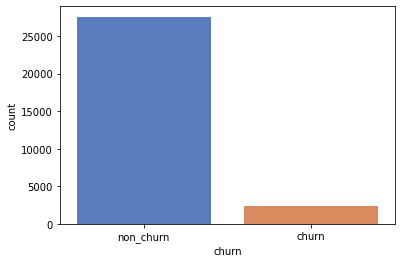

Customers who have not churned out are:-  91.86 %
Customers who have churned out are:-  8.14 %


In [178]:
print('Customers(0:Non Churn, 1:Churn)')
print(churn_filtered['churn'].value_counts())
sns.countplot(x='churn', data=churn_filtered, palette='muted')
plt.xticks(ticks = [1,0], labels=['churn' ,'non_churn'])
plt.show()

c= churn_filtered.churn.sum()
nc= len(churn_filtered)-c

cperc= round(c/len(churn_filtered)*100,2)
ncperc= round(nc/len(churn_filtered)*100,2)

print("Customers who have not churned out are:- ",ncperc,'%')
print("Customers who have churned out are:- ",cperc,'%')

- The above graph suggests that yes they are doing really well when it comes to churning of customers 
- 08.14 % customers are churning out and 91.86 % are interested in continuing the service 

In [181]:
def eda(telecomCols):
    plt.rcParams["figure.figsize"] = [15, 6]
    fig = plt.figure()
    cols = {c: telecomCols + "_" + str(c) for c in [6,7,8]}
    print(cols)
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=churn_filtered, y=telecomCols + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=churn_filtered, y=telecomCols + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=churn_filtered, y=telecomCols + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2]);

{6: 'total_og_mou_6', 7: 'total_og_mou_7', 8: 'total_og_mou_8'}


<Figure size 1080x432 with 0 Axes>

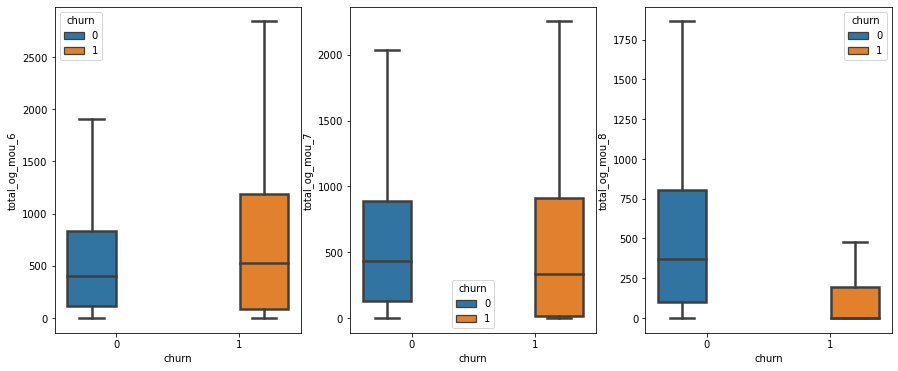

In [202]:
# Analysis of Total monthly usage of outgoing calls
eda('total_og_mou')

{6: 'total_ic_mou_6', 7: 'total_ic_mou_7', 8: 'total_ic_mou_8'}


<Figure size 1080x432 with 0 Axes>

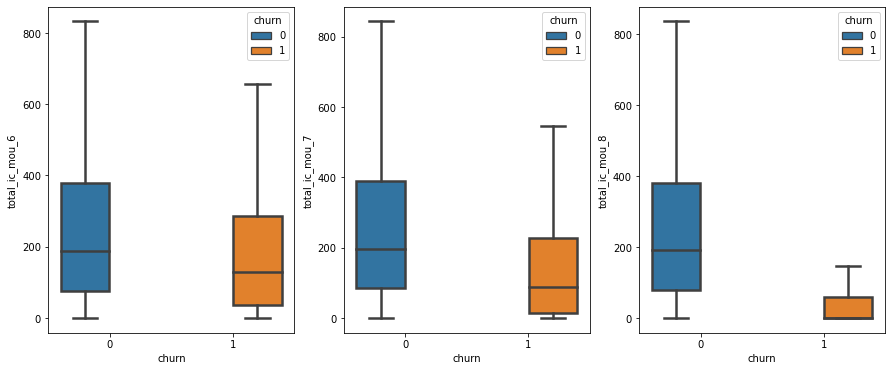

In [203]:
# Analysis of Total monthly usage of incoming calls
eda('total_ic_mou')

- The above graph shows that in the minutes of usage of churned customers decreases as we go from good phase to the action phase.
- The minutes of usage of non-churned customers is relatively equal in all months.

{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


<Figure size 1080x432 with 0 Axes>

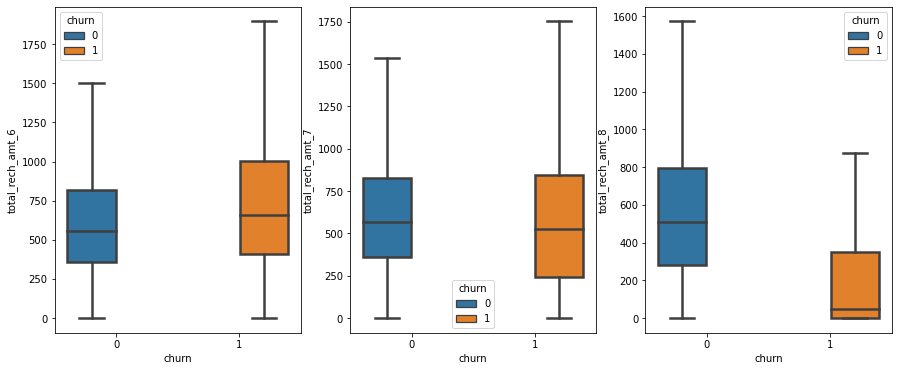

In [204]:
eda('total_rech_amt')

- The recharge amount of churned customers reduces drastically in the action phase.

In [184]:
def eda_2(telecomCols):
    plt.rcParams["figure.figsize"] = [15, 6]
    fig = plt.figure()
    cols = {c: telecomCols + "_" + str(c) for c in [6,7,8]}
    print(cols)
    f,axes = plt.subplots(nrows=1, ncols=3)
    ax4 = sns.countplot(x=telecomCols + "_6", hue="churn", data=churn_filtered, palette="Set2", ax=axes[0])
    ax5 = sns.countplot(x=telecomCols + "_7", hue="churn", data=churn_filtered, palette="Set2", ax=axes[1])
    ax6 = sns.countplot(x=telecomCols + "_8", hue="churn", data=churn_filtered, palette="Set2", ax=axes[2])

{6: 'night_pck_user_6', 7: 'night_pck_user_7', 8: 'night_pck_user_8'}


<Figure size 1080x432 with 0 Axes>

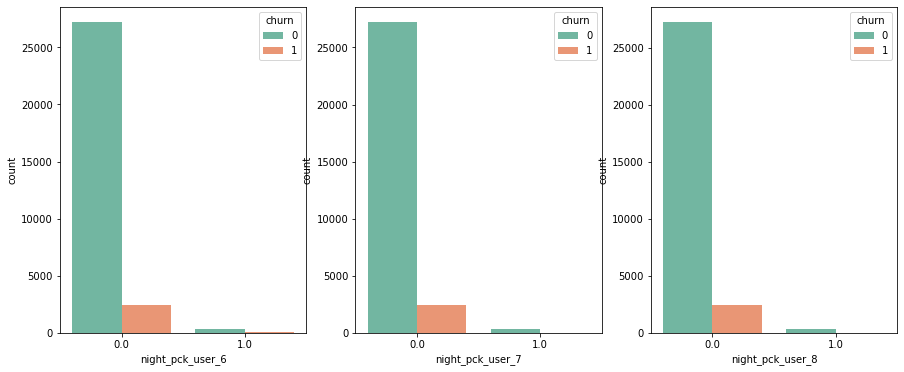

In [185]:
eda_2('night_pck_user')

- From the above graph, we can infer that the percentage of customers who use night pack are far lower than non users of night pack. 

{6: 'fb_user_6', 7: 'fb_user_7', 8: 'fb_user_8'}


<Figure size 1080x432 with 0 Axes>

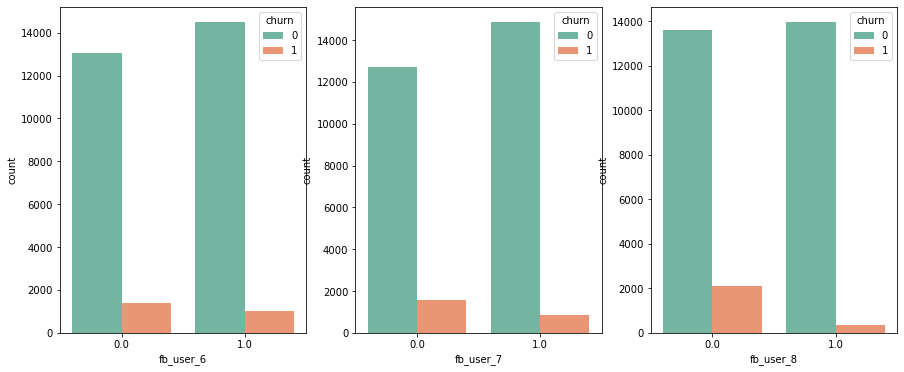

In [186]:
eda_2('fb_user')

- From the above graph, we can infer that the number of churned out customers using Facebook shows a reducing trend, whereas the usage pattern of non-churners is relatively similar as the months progresses.

## Comparision between 2g and 3g customers 

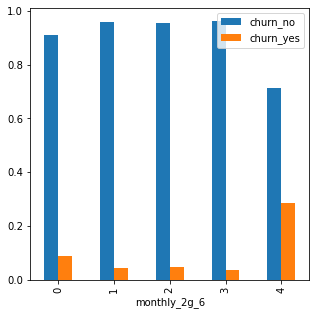

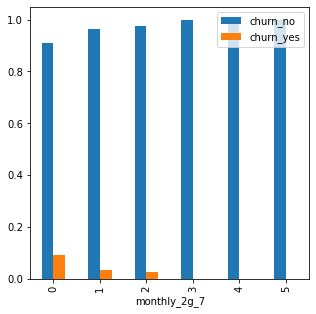

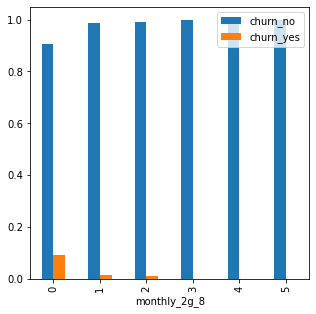

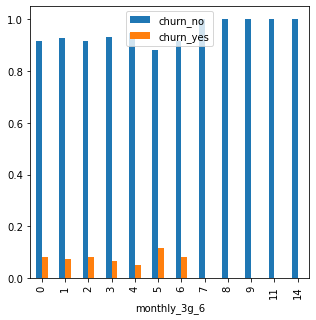

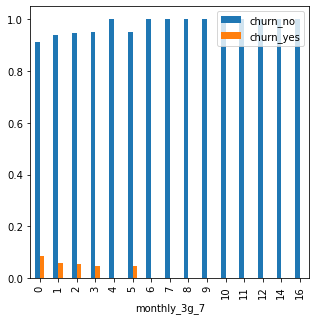

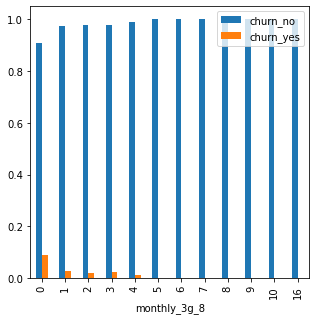

In [199]:
#No. of monthly pack recharges for 2G and 3G
df_eda=churn_filtered.copy()
gbcols=['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8',]
df_eda['churn_no']=df_eda['churn']==0
df_eda['churn_yes']=df_eda['churn']==1
for feature in gbcols:
    x=df_eda[['churn_no','churn_yes',feature]]
    y=x.set_index(feature)
    z=y.groupby(feature).mean()
    z.plot(kind='bar', figsize=(5,5))

- We can see that number of recharges of monthly packs of churned customers shows a decresing trend as the months progresses. This tells us that the churned out customers are not satisfied with the services received.
- The usage of 3G is more than 2G.